In [17]:
import numpy as np
import matplotlib.pyplot as plt

from auto_robot_design.optimization.problems import MultiCriteriaProblem
from auto_robot_design.optimization.optimizer import PymooOptimizer
from auto_robot_design.optimization.saver import load_checkpoint

In [18]:
import tkinter as tk
from tkinter import filedialog

def select_directory():
    # Create a root window
    root = tk.Tk()
    # Hide the root window
    root.withdraw()
    # Make the root window the topmost window
    root.call('wm', 'attributes', '.', '-topmost', True)
    # Open directory dialog and store the selected directory path
    directory_path = filedialog.askdirectory(initialdir="./",
        title="Select a directory"
    )
    root.update_idletasks() 
    root.destroy()
    # Check if a directory was selected
    if directory_path:
        #print(f"Selected directory: {directory_path}")
        return directory_path
    else:
        #print("No directory selected")
        return None

# Call the function to open the directory dialog
selected_directory = select_directory()
print(f"Resulting directory path: {selected_directory}")

Resulting directory path: D:/work/projects/mechanism_builder/apps/experiments/all_topologies_imf_hl_three_trajectories/results/imf_zrr_vertical/filtered_topologies_100gen_64pop


In [19]:
import os 
from pathlib import Path
subfolders = [os.path.join(selected_directory, f) for f in os.scandir(selected_directory) if f.is_dir()]

3 :  ['ZRR Reward', 'Trajectory IMF']
4 :  ['ZRR Reward', 'Trajectory IMF']
5 :  ['ZRR Reward', 'Trajectory IMF']
3 :  ['ZRR Reward', 'Trajectory IMF']
4 :  ['ZRR Reward', 'Trajectory IMF']
5 :  ['ZRR Reward', 'Trajectory IMF']
3 :  ['ZRR Reward', 'Trajectory IMF']
4 :  ['ZRR Reward', 'Trajectory IMF']
5 :  ['ZRR Reward', 'Trajectory IMF']
3 :  ['ZRR Reward', 'Trajectory IMF']
4 :  ['ZRR Reward', 'Trajectory IMF']
5 :  ['ZRR Reward', 'Trajectory IMF']


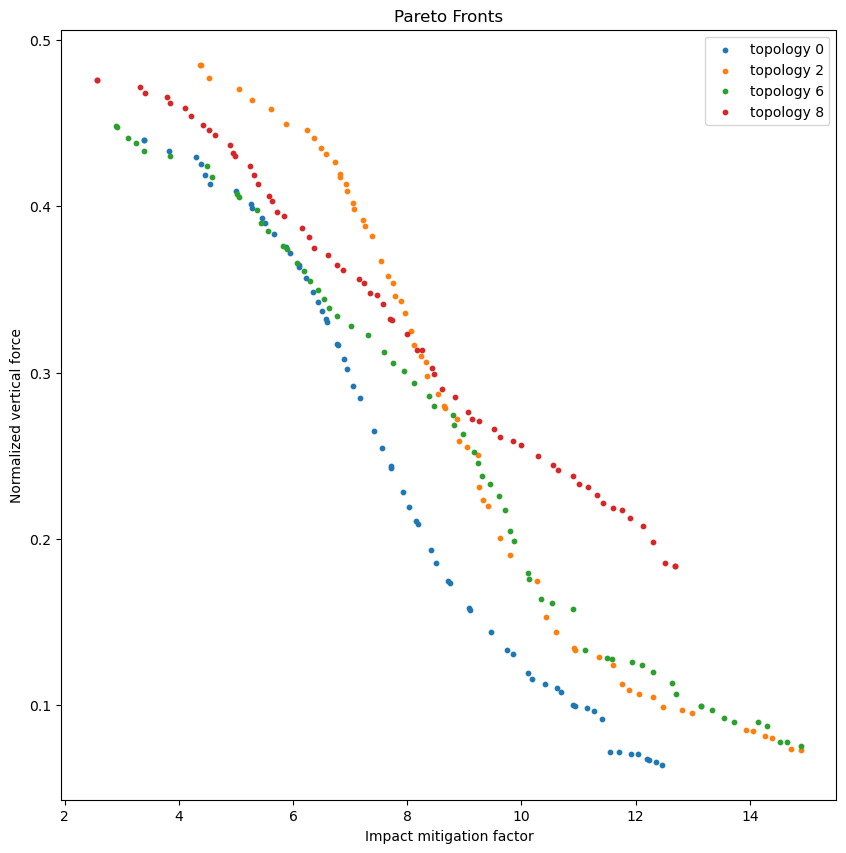

In [20]:
labels = []

plt.figure(figsize=(10, 10))
skiped = [1,3,4,5,7]
# skiped = [1,2,3,5,6,8]
topologies = [0,2,6,8]
for idx, dir in enumerate(subfolders):
    # if idx in skiped:
    #     continue
    problem = MultiCriteriaProblem.load(
        dir
    )
    
    checkpoint = load_checkpoint(dir)
    optimizer = PymooOptimizer(problem, checkpoint)
    optimizer.load_history(dir)
    res = optimizer.run()
    F = res.F
    plt.scatter(-res.F[:,0], -res.F[:,1],s=10)
    labels.append(f"topology {topologies[idx]}")
    for key, value in problem.rewards_and_trajectories.rewards.items():
        print(key,": ", [x[0].reward_name for x in value])

history_mean = optimizer.history["Mean"]
reward_labels = []
for trajectory_idx, rewards in problem.rewards_and_trajectories.rewards.items():
    for reward in rewards:
        reward_labels.append(reward[0].reward_name)
plt.legend(labels)
# plt.xlabel(list(set(reward_labels))[0])
# plt.ylabel(list(set(reward_labels))[1])
# plt.xlabel('Impact mitigation factor')
# plt.ylabel('Inverse vertical reduction ratio')
plt.xlabel('Impact mitigation factor')
plt.ylabel('Normalized vertical force')
plt.title("Pareto Fronts")
plt.savefig('./pareto_fronts.pdf')
plt.show()

In [21]:
problem.rewards_and_trajectories.rewards


{3: [(<auto_robot_design.optimization.rewards.pure_jacobian_rewards.ZRRReward at 0x23f46b86ca0>,
   1),
  (<auto_robot_design.optimization.rewards.inertia_rewards.TrajectoryIMFReward at 0x23f46b86a60>,
   1)],
 4: [(<auto_robot_design.optimization.rewards.pure_jacobian_rewards.ZRRReward at 0x23f46b86ca0>,
   1),
  (<auto_robot_design.optimization.rewards.inertia_rewards.TrajectoryIMFReward at 0x23f46b86a60>,
   1)],
 5: [(<auto_robot_design.optimization.rewards.pure_jacobian_rewards.ZRRReward at 0x23f46b86ca0>,
   1),
  (<auto_robot_design.optimization.rewards.inertia_rewards.TrajectoryIMFReward at 0x23f46b86a60>,
   1)]}

In [22]:
list(set(reward_labels))

['Trajectory IMF', 'ZRR Reward']

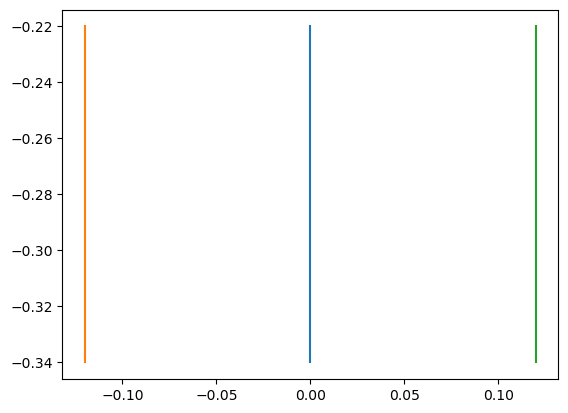

In [23]:
for _, trajectory in problem.rewards_and_trajectories.trajectories.items():
    plt.plot(trajectory[50:, 0], trajectory[50:, 2])